# Проектная работа по модулю “Математика и статистика в Python”

Автор: Халиуллин Айрат

#### 1. Загрузить файл hr.csv

In [55]:
from scipy import stats

# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [13]:
import pandas as pd
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [14]:
data.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [15]:
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [16]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [18]:
data.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

In [19]:
data.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

#### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

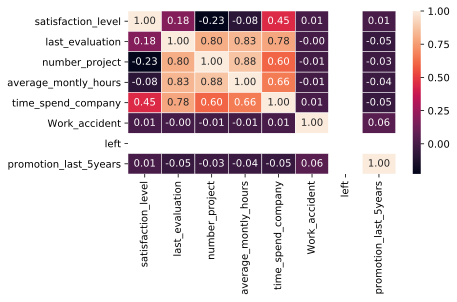

In [20]:
# для уволившихся сотрудников
corr = data[data['left']==1].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, fmt=".2f", 
            linewidths=0.5)

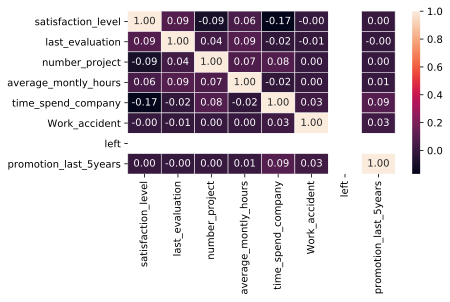

In [21]:
# для работающих сотрудников
corr = data[data['left']==0].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, fmt=".2f", 
            linewidths=0.5)

In [22]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


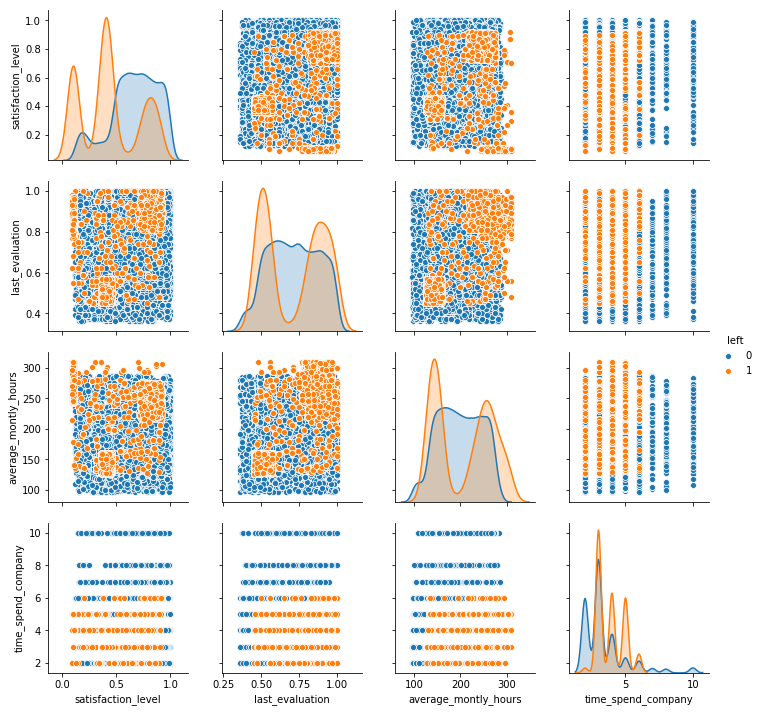

In [23]:
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(data, vars=['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company'], hue='left');
#sns_plot = sns.pairplot(data[data['left']==1]);

sns_plot.savefig('pairplot.png')

In [24]:
#### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [25]:
#### 6. Рассчитать сколько работников работает в каждом департаменте

In [26]:
sales1 = data['sales'].value_counts()
sales1.head(100)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [27]:
#### 7. Показать распределение сотрудников по зарплатам

In [28]:
ssalary = data[['sales', 'salary']]
ssalary['count'] = 1

In [29]:
salary1 = ssalary.groupby(['salary']).sum()
salary1.head()

,count
salary,
high,1237
low,7316
medium,6446


In [30]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

labels = salary1.index
values = salary1['count']

trace = go.Pie(labels=labels, values=values)

iplot([trace], show_link=False)

In [31]:
#### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [32]:
salary2 = ssalary.pivot_table(index='sales',columns='salary',aggfunc=sum)
salary2.head()

count            
salary      high  low medium
sales                       
IT            83  609    535
RandD         51  364    372
accounting    74  358    335
hr            45  335    359
management   225  180    225

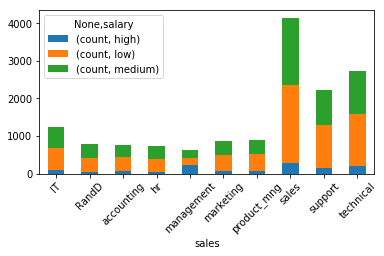

In [33]:
salary2.plot(kind='bar', rot=45, stacked=True);

In [34]:
#### 9. Сколько сотрудников покинули компанию

In [35]:
len(data[data['left'] == 1])

3571

In [36]:
#### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

1. Посмотрим как распределяется количество уволившихся сотрудников по уровням зарплаты

In [45]:
salary1 = data[['salary','left']][data['left']==1].groupby(['salary']).sum()
salary1.head()

,left
salary,
high,82
low,2172
medium,1317


In [46]:
trace = go.Pie(labels=salary1.index, values=salary1['left'])
iplot([trace], show_link=False)

Из гистограммы видно что 60.8% уволившихся сотрудников имели низкий уровень ЗП. Из этого можно следать вывод, что одной из причин уволнения сотрудников был низкий уровень ЗП.

2. Посмотрим как средний "уровень удовлетворенности" связан в фактом увольнения сотрудников

In [57]:
satisfact0 = data[['left', 'satisfaction_level']]
satisfact = satisfact0.pivot_table(index='left',aggfunc=mean)
satisfact.head()

,satisfaction_level
left,
0,0.666810
1,0.440098


In [78]:
# видно, что средний уровень удовлетворенности уволившихся сотрудников ниже чем работающих. 
# Сделаем предположение, что увольнения связаны с низким уровнем удовлетворенности.
# Если мы ошибаемся, то уровень удовлетворенности никак не влияет на увольнения, т.е. матожидания в выборках 
# data['satisfaction_level'], для "left"=0 и "left"=1 должны быть равны...

Пусть $H_0$ - средний уровень удовлетворенности уволившихся сотрудников 
равен среднему уровеню удовлетворенности работающих сотрудников. $H_1$ - уровень удовлетворенности уволившихся сотрудников ниже, и это можно считать одной из причин уволнения

In [77]:
a = list(satisfact0[satisfact0['left']==0]['satisfaction_level'])
b = list(satisfact0[satisfact0['left']==1]['satisfaction_level'])
na = len(a)//100
nb = len(b)//100
n = 35
# построим распределение выборочных средних, т.к. оно имеет нормальный вид, 
# тогда можно будет применить ttest, для сравнения матожиданий
ma = [np.mean(a[i*n:i*n+n]) for i in range(n)]
mb = [np.mean(b[i*n:i*n+n]) for i in range(n)]


In [76]:
stats.ttest_ind(ma, mb)

Ttest_indResult(statistic=22.50832799500315, pvalue=3.139372789536171e-33)


p-value << 0.05, это значит, что гипотиза $H_0$, о равенстве уровней удовлетворенности отвергается в пользу $H_1$